#                        Advanced Machine learning

---


#### Assignment 1

---

For the IMDB example that we discussed in class, do the following:

1.You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

3.Try using the 'mse' loss function instead of 'binary_crossentropy'.

4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

.5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.



---



### Setting up the environment



In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers


### Loading the IMDB dataset




In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# Decoding reviews back to text

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

In [4]:
# Encoding the integer sequences via multi-hot encoding

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

In [6]:
#  Model definition
from tensorflow import keras
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# Training your model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5244 - accuracy: 0.7824 - val_loss: 0.4021 - val_accuracy: 0.8595
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3086 - accuracy: 0.9031 - val_loss: 0.3051 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2227 - accuracy: 0.9260 - val_loss: 0.2829 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1767 - accuracy: 0.9407 - val_loss: 0.2756 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1430 - accuracy: 0.9536 - val_loss: 0.2828 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1158 - accuracy: 0.9645 - val_loss: 0.3386 - val_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0972 - accuracy: 0.9714 - val_loss: 0.3142 - val_accuracy: 0.8814
Epoch 8/20
30

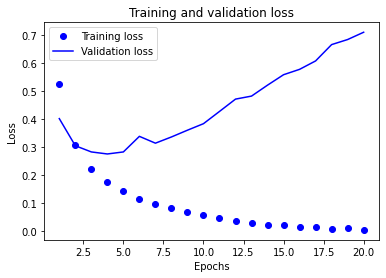

In [10]:
# Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

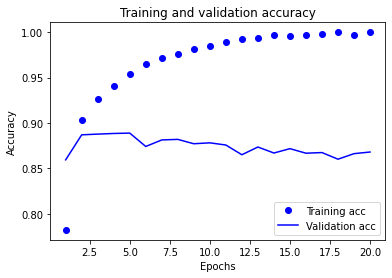

In [11]:
# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4428 - accuracy: 0.8291
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2598 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2028 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3213 - accuracy: 0.8723


# **Assginment questions**
### 1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [13]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [15]:
# Training your model

history_11 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_12 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5723 - accuracy: 0.7483 - val_loss: 0.4130 - val_accuracy: 0.8681
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3209 - accuracy: 0.8971 - val_loss: 0.2982 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2228 - accuracy: 0.9241 - val_loss: 0.2775 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1641 - accuracy: 0.9455 - val_loss: 0.3243 - val_accuracy: 0.8713
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1307 - accuracy: 0.9573 - val_loss: 0.3145 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1058 - accuracy: 0.9671 - val_loss: 0.3227 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0905 - accuracy: 0.9718 - val_loss: 0.3471 - val_accuracy: 0.8782
Epoch 8/20
30

In [16]:
model_11.summary()
model_12.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
__________________________

No handles with labels found to put in legend.


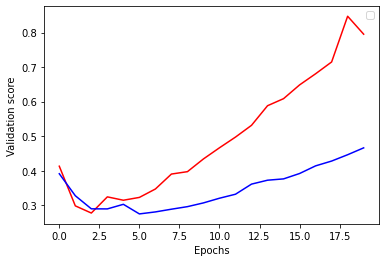

In [17]:
# Plotting the training and validation loss
history_dict_11 = history_11.history
history_dict_12 = history_12.history

plt.plot(history_11.history['val_loss'], 'r', history_12.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()

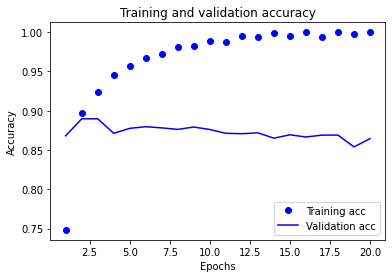

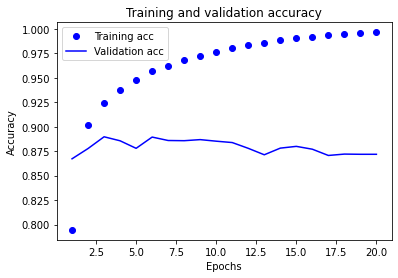

In [18]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_11["accuracy"]
val_acc = history_dict_11["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#-------------------------------------------
#plot_loss(history_dict_11.history['loss'], history_dict_11.history['val_loss'])
#-------------------------------------------

plt.clf()
acc = history_dict_12["accuracy"]
val_acc = history_dict_12["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [19]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])



In [21]:
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [22]:
history_21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.4801 - accuracy: 0.7905 - val_loss: 0.3379 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2651 - accuracy: 0.9036 - val_loss: 0.3122 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1932 - accuracy: 0.9319 - val_loss: 0.2749 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1501 - accuracy: 0.9493 - val_loss: 0.3023 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1163 - accuracy: 0.9605 - val_loss: 0.3167 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0949 - accuracy: 0.9686 - val_loss: 0.3335 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0833 - accuracy: 0.9707 - val_loss: 0.3661 - val_accuracy: 0.8782
Epoch 8/20
30

In [23]:
model_21.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 322,209
Trainable params: 322,209
Non-trainable params: 0
_________________________________________________________________


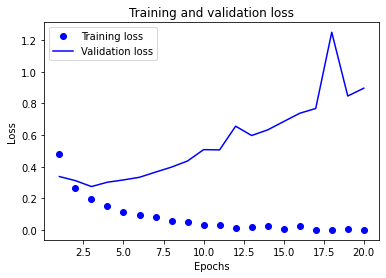

In [24]:
history_dict_21 = history_21.history
loss_values = history_dict_21["loss"]
val_loss_values = history_dict_21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

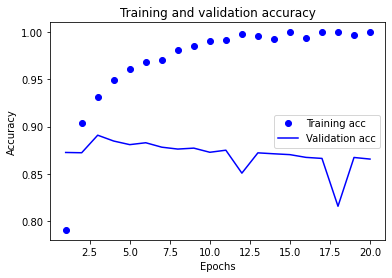

In [25]:
plt.clf()
acc = history_dict_21["accuracy"]
val_acc = history_dict_21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 3. Try using the 'mse' loss function instead of 'binary_crossentropy'.

In [26]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [27]:
model_3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [28]:
# Training your model

history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1778 - accuracy: 0.7777 - val_loss: 0.1219 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0945 - accuracy: 0.9004 - val_loss: 0.0941 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0670 - accuracy: 0.9280 - val_loss: 0.0958 - val_accuracy: 0.8726
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0508 - accuracy: 0.9465 - val_loss: 0.0826 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0411 - accuracy: 0.9572 - val_loss: 0.0833 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0322 - accuracy: 0.9682 - val_loss: 0.0852 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0272 - accuracy: 0.9747 - val_loss: 0.0857 - val_accuracy: 0.8839
Epoch 8/20
30

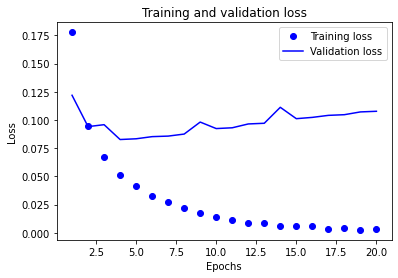

In [29]:
history_dict_3 = history_3.history
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

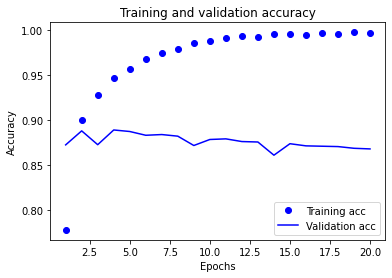

In [30]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_3["accuracy"]
val_acc = history_dict_3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

In [31]:
model_4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [32]:
model_4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [33]:
history_4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1599 - accuracy: 0.7935 - val_loss: 0.1126 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0803 - accuracy: 0.9125 - val_loss: 0.0884 - val_accuracy: 0.8868
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0558 - accuracy: 0.9359 - val_loss: 0.0819 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0410 - accuracy: 0.9532 - val_loss: 0.0839 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0307 - accuracy: 0.9655 - val_loss: 0.0870 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0245 - accuracy: 0.9724 - val_loss: 0.0913 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0181 - accuracy: 0.9797 - val_loss: 0.1043 - val_accuracy: 0.8677
Epoch 8/20
30

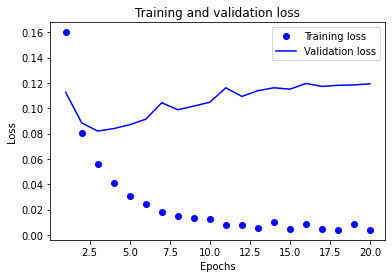

In [34]:
history_dict_4 = history_4.history
loss_values = history_dict_4["loss"]
val_loss_values = history_dict_4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

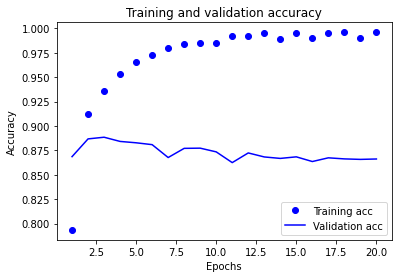

In [35]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_4["accuracy"]
val_acc = history_dict_4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [36]:
model_5 = keras.Sequential([
    #layers.Dropout(0.2),                        
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [37]:
# Compiling the model

model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [38]:
history_5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5217 - accuracy: 0.7783 - val_loss: 0.3791 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3318 - accuracy: 0.8893 - val_loss: 0.3371 - val_accuracy: 0.8668
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2493 - accuracy: 0.9150 - val_loss: 0.2766 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1961 - accuracy: 0.9349 - val_loss: 0.2785 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1605 - accuracy: 0.9452 - val_loss: 0.2878 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1354 - accuracy: 0.9535 - val_loss: 0.2933 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1090 - accuracy: 0.9648 - val_loss: 0.3367 - val_accuracy: 0.8811
Epoch 8/20
30

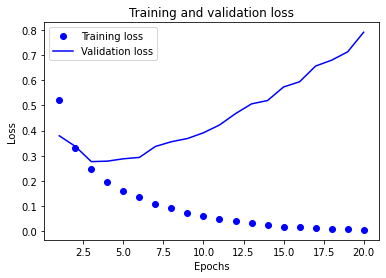

In [39]:
history_dict_5 = history_5.history
loss_values = history_dict_5["loss"]
val_loss_values = history_dict_5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

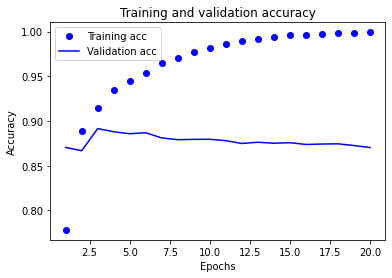

In [40]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_5["accuracy"]
val_acc = history_dict_5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()